<a href="https://colab.research.google.com/github/AthiFiz/deepLearning/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import tensorflow as tf
import numpy as np

In [101]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-11-22 12:02:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-22 12:02:11 (108 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [102]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [103]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

unzip_data("nlp_getting_started.zip")

--2023-11-22 12:02:11--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2023-11-22 12:02:11 (94.6 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [104]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df =pd.read_csv("test.csv")

In [105]:
train_df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [106]:
train_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [107]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [108]:
len(train_df)

7613

In [109]:
len(test_df)

3263

In [110]:
import random

random_index = random.randint(0, len(train_df)-1)

for row in train_df_shuffled[["text", "target"]][random_index-5: random_index].itertuples():
  _, text, target = row
  print(f"Target: {target} --> ", "real disaster" if target > 0 else "Not disaster")
  print(f"Text: \n {text}\n")
  print(f"----\n")

Target: 1 -->  real disaster
Text: 
 Hundreds feared drowned as migrant boat capsizes off Libya http://t.co/7S1GfNEBgt

----

Target: 0 -->  Not disaster
Text: 
 Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it #islam!

----

Target: 1 -->  real disaster
Text: 
 http://t.co/qr3YPEkfOe 
Seems they declared war against government..

----

Target: 0 -->  Not disaster
Text: 
 What is the role of usg in paeds major trauma imaging decision tool? #FOAMed #FOAMcc

----

Target: 1 -->  real disaster
Text: 
 Holmgren: We referred to those 35 days as 'the hostage situation.' We were Lou's 'hostages.'

----



In [111]:
X = train_df["text"]
y = train_df["target"]

In [112]:
type(X)

pandas.core.series.Series

In [113]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(X.to_numpy(),
                                                                            y.to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [114]:
train_sentences

array(["'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j",
       'w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3',
       "When I was cooking earlier I got electrocuted some crucial ?????? now I'm psychic lol",
       ...,
       'Omron HEM-712C Automatic Blood Pressure Monitor STANDARD AND LARGE BP CUFFS http://t.co/gJBAInQWN9 http://t.co/jPhgpL1c5x',
       'Officials say a quarantine is in place at an Alabama home over a possible Ebola case after developing symptoms... http://t.co/rqKK15uhEY',
       'I moved to England five years ago today. What a whirlwind of time it has been! http://t.co/eaSlGeA1B7'],
      dtype=object)

In [115]:
train_labels

array([0, 1, 0, ..., 0, 1, 1])

In [116]:
from tensorflow.keras.layers import TextVectorization

text_vetorizer = TextVectorization(max_tokens=None,
                                      standardize="lower_and_strip_punctuation",
                                      split="whitespace",
                                      ngrams=None,
                                      output_mode="int",
                                      output_sequence_length=None)

In [117]:
round(sum([len(sentence.split()) for sentence in train_sentences])/len(train_sentences))

15

In [118]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_sequence_length=max_length)

In [119]:
text_vectorizer.adapt(train_sentences)

In [120]:
sample_sentence = "THer's a flooe in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,   3,   1,   4,  13, 674,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [121]:
import random

random_sentence = random.choice(train_sentences)
text_vectorizer([random_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 66,  68, 730,  29, 665,  20, 167, 321,  21, 675,  10, 416,   6,
        341,   4]])>

In [122]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab)

10000

In [123]:
from tensorflow.keras import layers
tf.random.set_seed(42)

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embedding_1")


In [124]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Learning from the Legacy of a Catastrophic Eruption http://t.co/25sY9Y295L via @newyorker      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03146956, -0.01993964, -0.04156519, ..., -0.00344836,
          0.04080181, -0.02421463],
        [ 0.02669797, -0.04850852,  0.02195418, ...,  0.04411465,
          0.01119887,  0.023359  ],
        [-0.02692988,  0.04832878, -0.01231597, ...,  0.00570093,
         -0.02726411, -0.02139224],
        ...,
        [-0.03377608,  0.02039276, -0.00422982, ..., -0.00193115,
         -0.02832505,  0.01288176],
        [-0.03377608,  0.02039276, -0.00422982, ..., -0.00193115,
         -0.02832505,  0.01288176],
        [-0.03377608,  0.02039276, -0.00422982, ..., -0.00193115,
         -0.02832505,  0.01288176]]], dtype=float32)>

In [125]:
sample_embed

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03146956, -0.01993964, -0.04156519, ..., -0.00344836,
          0.04080181, -0.02421463],
        [ 0.02669797, -0.04850852,  0.02195418, ...,  0.04411465,
          0.01119887,  0.023359  ],
        [-0.02692988,  0.04832878, -0.01231597, ...,  0.00570093,
         -0.02726411, -0.02139224],
        ...,
        [-0.03377608,  0.02039276, -0.00422982, ..., -0.00193115,
         -0.02832505,  0.01288176],
        [-0.03377608,  0.02039276, -0.00422982, ..., -0.00193115,
         -0.02832505,  0.01288176],
        [-0.03377608,  0.02039276, -0.00422982, ..., -0.00193115,
         -0.02832505,  0.01288176]]], dtype=float32)>

In [126]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.03146956, -0.01993964, -0.04156519,  0.0426906 ,  0.0196306 ,
        0.01427313,  0.01670624,  0.01510881, -0.02705996, -0.01717074,
       -0.00248455,  0.03892121,  0.02861836, -0.01373962, -0.02292905,
       -0.04517561,  0.02490828, -0.0247111 ,  0.04631872,  0.03779042,
        0.04775243, -0.01702245, -0.02496135,  0.01470978, -0.02994438,
       -0.00849469, -0.00054133,  0.04937031,  0.01471409,  0.01219832,
        0.04396113, -0.01289793, -0.03094971,  0.0346179 , -0.0395417 ,
        0.03464984, -0.01220904,  0.01702222, -0.01113404,  0.00853013,
        0.03897661, -0.01902892,  0.02618254,  0.0470876 ,  0.04371675,
        0.03875036,  0.04949547,  0.03582281,  0.01409192, -0.0497757 ,
        0.02377138, -0.02954055, -0.04587451, -0.03773602, -0.02266885,
       -0.02122277,  0.04436077, -0.04948837, -0.00475578, -0.04580876,
       -0.02405968,  0.03292321,  0.01833181,  0.0010054 ,  0.03113183,
        0.013245

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [128]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Baseline model accurace is {baseline_score*100:.2f}%")

Baseline model accurace is 77.82%


In [129]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [130]:
from sklearn.metrics import classification_report

print(classification_report(val_labels, baseline_preds))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       426
           1       0.86      0.60      0.70       336

    accuracy                           0.78       762
   macro avg       0.80      0.76      0.76       762
weighted avg       0.79      0.78      0.77       762



In [131]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)*100
  model_precision, model_recall, model_fscore, _  = precision_recall_fscore_support(y_true, y_pred, average="weighted")

  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_fscore}

  return model_results

In [132]:
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 77.82152230971128,
 'precision': 0.792992256322435,
 'recall': 0.7782152230971129,
 'f1': 0.7703527809038113}

In [133]:
train_sentences

array(["'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j",
       'w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3',
       "When I was cooking earlier I got electrocuted some crucial ?????? now I'm psychic lol",
       ...,
       'Omron HEM-712C Automatic Blood Pressure Monitor STANDARD AND LARGE BP CUFFS http://t.co/gJBAInQWN9 http://t.co/jPhgpL1c5x',
       'Officials say a quarantine is in place at an Alabama home over a possible Ebola case after developing symptoms... http://t.co/rqKK15uhEY',
       'I moved to England five years ago today. What a whirlwind of time it has been! http://t.co/eaSlGeA1B7'],
      dtype=object)

In [134]:
from tensorflow.keras.layers import TextVectorization

text_vetorizer = TextVectorization(max_tokens=None,
                                   standardize="lower_and_strip_punctuation",
                                   split="whitespace",
                                   ngrams=None,
                                   output_mode="int",
                                   output_sequence_length=None)

In [135]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_sequence_length=max_length)

In [136]:
text_vectorizer.adapt(train_sentences)

In [137]:
tf.random.set_seed(42)

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embedding_1")

In [138]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [139]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [140]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_9 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_3  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [141]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 10s 41ms/step - loss: 0.6112 - accuracy: 0.6900 - val_loss: 0.5405 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4393 - accuracy: 0.8178 - val_loss: 0.4827 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3447 - accuracy: 0.8625 - val_loss: 0.4747 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2820 - accuracy: 0.8913 - val_loss: 0.4881 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.2353 - accuracy: 0.9117 - val_loss: 0.5016 - val_accuracy: 0.7861


In [142]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 7ms/step - loss: 0.5016 - accuracy: 0.7861


[0.5016298890113831, 0.7860892415046692]

In [143]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.00143423,  0.01383367, -0.01821595, ...,  0.05037126,
          0.02701669,  0.04948545],
        [-0.05052225, -0.00103881, -0.00571829, ..., -0.00411531,
         -0.02161125,  0.05224011],
        [-0.0037456 ,  0.03514066,  0.02821107, ..., -0.01556667,
          0.00667185,  0.04287501],
        ...,
        [ 0.08991613, -0.10250368, -0.01866711, ..., -0.09866337,
          0.10472849, -0.02286784],
        [ 0.04999861, -0.038909  , -0.00967203, ...,  0.02168966,
          0.04410771, -0.008621  ],
        [-0.02795058,  0.04106391,  0.01120166, ..., -0.01309197,
         -0.03528577, -0.02573897]], dtype=float32)>]

In [144]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


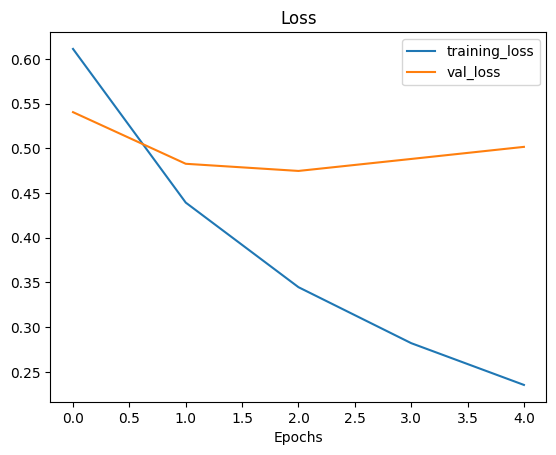

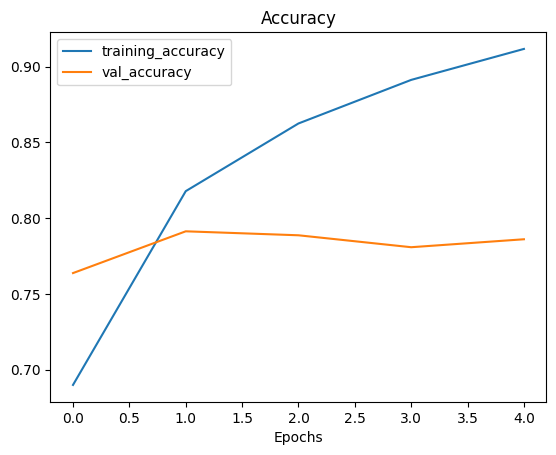

In [145]:
plot_loss_curves(model_1_history)

In [146]:
model_1_predict_probs = model_1.predict(val_sentences)
model_1_predict_probs[:5]

24/24 [==============================] - 0s 5ms/step


array([[0.0287441 ],
       [0.16324623],
       [0.3003592 ],
       [0.02155382],
       [0.5671936 ]], dtype=float32)

In [147]:
model_1_preds = tf.squeeze(tf.round(model_1_predict_probs))
model_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0

In [148]:
model_1_results = calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7889152355254331,
 'recall': 0.7860892388451444,
 'f1': 0.7828830741725987}

In [149]:
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 77.82, New accuracy: 78.61, Difference: 0.79
Baseline precision: 0.79, New precision: 0.79, Difference: -0.00
Baseline recall: 0.78, New recall: 0.79, Difference: 0.01
Baseline f1: 0.77, New f1: 0.78, Difference: 0.01


In [150]:
#  Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# # Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [151]:
tf.random.set_seed(42)

model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [152]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [153]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 16s 54ms/step - loss: 0.5127 - accuracy: 0.7469 - val_loss: 0.4620 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3152 - accuracy: 0.8733 - val_loss: 0.5129 - val_accuracy: 0.7966
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2173 - accuracy: 0.9203 - val_loss: 0.5284 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1447 - accuracy: 0.9477 - val_loss: 0.6668 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1019 - accuracy: 0.9591 - val_loss: 0.9758 - val_accuracy: 0.7441


In [154]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_9 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [155]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

24/24 [==============================] - 0s 4ms/step


((762, 1),
 array([[1.5708460e-03],
        [3.5891819e-01],
        [4.2064181e-03],
        [1.8696898e-03],
        [9.9649990e-01],
        [6.7632549e-02],
        [6.4975739e-04],
        [2.1265784e-02],
        [3.2728189e-03],
        [9.9135441e-01]], dtype=float32))

In [156]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>

In [157]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 74.40944881889764,
 'precision': 0.7431680989190498,
 'recall': 0.7440944881889764,
 'f1': 0.7431626759667316}

In [158]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 77.82, New accuracy: 74.41, Difference: -3.41
Baseline precision: 0.79, New precision: 0.74, Difference: -0.05
Baseline recall: 0.78, New recall: 0.74, Difference: -0.03
Baseline f1: 0.77, New f1: 0.74, Difference: -0.03


In [159]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [160]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [161]:
# Get a summary of the GRU model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_9 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [162]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 11s 39ms/step - loss: 0.5396 - accuracy: 0.7222 - val_loss: 0.4683 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3237 - accuracy: 0.8699 - val_loss: 0.5122 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2227 - accuracy: 0.9149 - val_loss: 0.5135 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1549 - accuracy: 0.9450 - val_loss: 0.6082 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1179 - accuracy: 0.9597 - val_loss: 0.7796 - val_accuracy: 0.7717


In [163]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.00178474],
        [0.01981942],
        [0.00624899],
        [0.00640035],
        [0.84531844],
        [0.00460567],
        [0.00126224],
        [0.02856593],
        [0.00577528],
        [0.9839145 ]], dtype=float32))

In [164]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>

In [165]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.16535433070865,
 'precision': 0.7758636604347956,
 'recall': 0.7716535433070866,
 'f1': 0.7672384944827477}

In [166]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 77.82, New accuracy: 77.17, Difference: -0.66
Baseline precision: 0.79, New precision: 0.78, Difference: -0.02
Baseline recall: 0.78, New recall: 0.77, Difference: -0.01
Baseline f1: 0.77, New f1: 0.77, Difference: -0.00
